In [1]:
%cd ~/desktop/RNA/casp16
casp_id = "R1293"
pdb_dir=f"./datasets/casp16/{casp_id}/zdock/pdb"

/Users/sumishunsuke/Desktop/RNA/casp16


# energy(M1293で実行済み)

In [2]:
# !ls {pdb_dir}/*pdb | wc -l

# !python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir} --cpu 6

# 距離計算

In [5]:
%cd ~/desktop/RNA/casp16
import warnings
warnings.filterwarnings('ignore')
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd

casp_id = "R1293"
pdb_dir=f"./datasets/casp16/{casp_id}/pdb"

/Users/sumishunsuke/Desktop/RNA/casp16


In [6]:
# !time python scripts/calc_rmsd.py --pdb_dir {top_pdb_dir} --cpu 8 --print_every 5
!time python scripts/calc_rmsd.py --pdb_dir {pdb_dir} --cpu 6 --print_every 5

['S_000001.pdb', 'S_000002.pdb', 'S_000003.pdb', 'S_000004.pdb', 'S_000005.pdb']
Number of pdb files: 1000
Calculating RMSD matrix 1000x1000 using 6 cpus
Calculating RMSD for 0th pdb file
Calculating RMSD for 65th pdb file
Calculating RMSD for 45th pdb file
Calculating RMSD for 90th pdb file
Calculating RMSD for 25th pdb file
Calculating RMSD for 115th pdb file
Calculating RMSD for 5th pdb file
Calculating RMSD for 70th pdb file
Calculating RMSD for 95th pdb file
Calculating RMSD for 50th pdb file
Calculating RMSD for 30th pdb file
Calculating RMSD for 120th pdb file
Calculating RMSD for 75th pdb file
Calculating RMSD for 10th pdb file
Calculating RMSD for 100th pdb file
Calculating RMSD for 55th pdb file
Calculating RMSD for 125th pdb file
Calculating RMSD for 35th pdb file
Calculating RMSD for 80th pdb file
Calculating RMSD for 15th pdb file
Calculating RMSD for 105th pdb file
Calculating RMSD for 60th pdb file
Calculating RMSD for 130th pdb file
Calculating RMSD for 40th pdb file
Ca

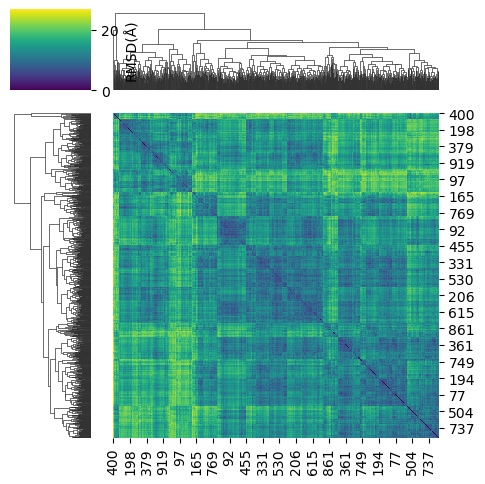

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
g = sns.clustermap(rmsd, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})
plt.tight_layout()
plt.savefig(f"{pdb_dir}/rmsd_clustermap.png", dpi = 300)

In [12]:
!ls {pdb_dir}/*pdb | head

./datasets/casp16/R1293/pdb/S_000001.pdb
./datasets/casp16/R1293/pdb/S_000002.pdb
./datasets/casp16/R1293/pdb/S_000003.pdb
./datasets/casp16/R1293/pdb/S_000004.pdb
./datasets/casp16/R1293/pdb/S_000005.pdb
./datasets/casp16/R1293/pdb/S_000006.pdb
./datasets/casp16/R1293/pdb/S_000007.pdb
./datasets/casp16/R1293/pdb/S_000008.pdb
./datasets/casp16/R1293/pdb/S_000009.pdb
./datasets/casp16/R1293/pdb/S_000010.pdb
ls: stdout: Undefined error: 0


In [10]:
all_pdb_ids = !ls {pdb_dir}/*pdb | xargs -n 1 basename | cut -d. -f1
print(len(all_pdb_ids))
print(all_pdb_ids[:3])

1000
['S_000001', 'S_000002', 'S_000003']


In [11]:
df_rmsd = pd.DataFrame(rmsd, columns=all_pdb_ids, index=all_pdb_ids)
df_rmsd.to_csv(f"{pdb_dir}/rmsd_matrix_sorted_id.csv")

# clustering

In [13]:
import numpy as np
from sklearn.manifold import MDS

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

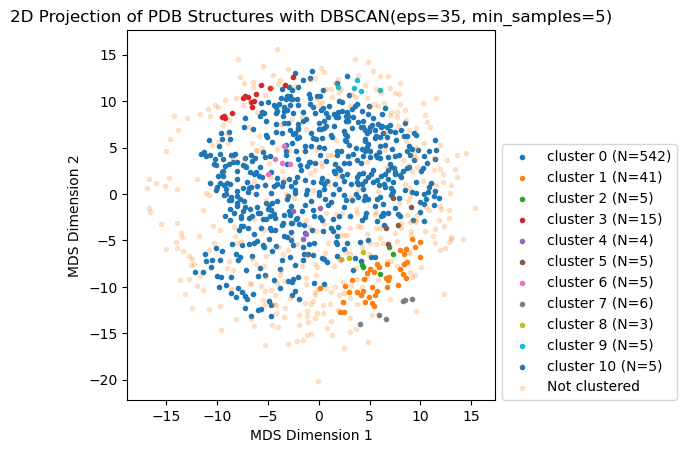

In [20]:
from sklearn.cluster import DBSCAN
eps =  35
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.subplots_adjust(right=0.7)
plt.savefig(f"{pdb_dir}/rmsd_mds_dbscan_eps{eps}_min_samples{min_samples}.png", dpi=300)
plt.show()


In [29]:
import pandas as pd

df_scores = pd.read_csv(f"./datasets/casp16/M1293/zdock/pdb/M1293_scores.csv")
top_pdbs = !ls {pdb_dir}/*.pdb
# top_pdbs = [os.path.basename(pdb).replace("-top1.pdb", "").replace("zdock.", "") for pdb in top_pdbs]
# df_scores = df_scores[df_scores["pdb"].isin(top_pdbs)]
df_scores.drop(columns=["ZDOCKscore"], inplace=True)

In [33]:
df_scores["cluster"] = clustering.labels_

eps = 40
df_scores.to_csv(f"{pdb_dir}/{casp_id}_scores_clustered_eps{eps}.csv", index=False)
df_scores = pd.read_csv(f"{pdb_dir}/{casp_id}_scores_clustered_eps{eps}.csv")
df_scores.head(3)

,pdb,BRiQscore,cluster
0,S_000001,-109.946,0
1,S_000002,-150.769,-1
2,S_000003,-102.537,-1


In [34]:
pdb_list = []

print(" Sorted by BRiQscore")
print(df_scores.sort_values("BRiQscore").head(5))
pdb_list.extend(df_scores.sort_values("BRiQscore").head(5)["pdb"].values)
print("**"*20)



 Sorted by BRiQscore
          pdb  BRiQscore  cluster
462  S_000463   -206.310        0
744  S_000745   -196.116        0
779  S_000780   -192.939        0
29   S_000030   -191.578       -1
447  S_000448   -190.701       -1
****************************************
